In [1]:
# import tweepy

import tweepy
from collections import defaultdict
import pandas as pd

from wordcloud import WordCloud
import matplotlib.pyplot as plt

from collections import Counter

LABOUR_HASHTAG = '#Labour'
TORY_HASHTAG = '#Tories'

In [2]:
keys = []
with open('twitter_keys.txt') as f:
    for line in f:
        keys.append(line.rstrip())

consumer_key = keys[0]
consumer_secret = keys[1]

access_token = keys[2]
access_token_secret = keys[3]



auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)



In [3]:
def get_api():
    #uncomment to use user auth instead of app auth
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_token_secret)
    #auth = tweepy.AppAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
    
    return tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True, retry_count=5, retry_delay=2*60)

In [4]:
def get_hashtag_tweets(api, hashtags):
    hashtag_tweets = defaultdict(list)
    for hashtag in hashtags:
        for tweet in tweepy.Cursor(api.search, hashtag).items(2000):
            hashtag_tweets[hashtag].append(tweet)
    
        print("Got %i tweets for hashtag %s" % (len(hashtag_tweets[hashtag]), hashtag))
        print('First tweet is', hashtag_tweets[hashtag][0])
    return hashtag_tweets

In [5]:
api = get_api()

hashtag_tweets = get_hashtag_tweets(api, [LABOUR_HASHTAG, TORY_HASHTAG])

Got 2000 tweets for hashtag #Labour
First tweet is Status(_api=<tweepy.api.API object at 0x11a3ee438>, _json={'created_at': 'Fri Jul 07 13:38:49 +0000 2017', 'id': 883319395249905665, 'id_str': '883319395249905665', 'text': 'Poor ole daily mail love negative story to attack anti Tory or extreme right. Lets hope #Labour pull together to kn… https://t.co/uGY3548tMc', 'truncated': True, 'entities': {'hashtags': [{'text': 'Labour', 'indices': [88, 95]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/uGY3548tMc', 'expanded_url': 'https://twitter.com/i/web/status/883319395249905665', 'display_url': 'twitter.com/i/web/status/8…', 'indices': [117, 140]}]}, 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'}, 'source': '<a href="https://mobile.twitter.com" rel="nofollow">Twitter Lite</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id'

Rate limit reached. Sleeping for: 842
Got 2000 tweets for hashtag #Tories
First tweet is Status(_api=<tweepy.api.API object at 0x11a3ee438>, _json={'created_at': 'Fri Jul 07 13:39:44 +0000 2017', 'id': 883319625487966208, 'id_str': '883319625487966208', 'text': "You can tell the #Tories &amp; the rightwing media fear #Labour ATM, hence their attempts to create division - we mustn't play into their hands👍", 'truncated': False, 'entities': {'hashtags': [{'text': 'Tories', 'indices': [17, 24]}, {'text': 'Labour', 'indices': [56, 63]}], 'symbols': [], 'user_mentions': [], 'urls': []}, 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'}, 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 3399023392, 'id_str': '3399023392', 'name': '(((AJ)))❄️🇪🇺🌹', 'screen_name'

In [4]:
len(hashtag_tweets[TORY_HASHTAG])



NameError: name 'hashtag_tweets' is not defined

In [7]:
hashtag_tweets.keys()

dict_keys(['#Labour', '#Tories'])

In [8]:
hashtag_tweets[LABOUR_HASHTAG][1]

Status(_api=<tweepy.api.API object at 0x11a3ee438>, _json={'created_at': 'Fri Jul 07 13:37:58 +0000 2017', 'id': 883319180749152256, 'id_str': '883319180749152256', 'text': 'RT @Harryslaststand: If #Labour loses  next election it wont be b/c of Corbyn but will be caused by those who oppose a fair deal for all\nht…', 'truncated': False, 'entities': {'hashtags': [{'text': 'Labour', 'indices': [24, 31]}], 'symbols': [], 'user_mentions': [{'screen_name': 'Harryslaststand', 'name': 'Harry Leslie Smith', 'id': 209176493, 'id_str': '209176493', 'indices': [3, 19]}], 'urls': []}, 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'}, 'source': '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 110051433, 'id_str': '110051433', 'name': 'Chris Haddow', 'screen_name': 'fr0mn0where', 'location':

In [9]:
#result = hashtag_tweets['#Corbyn'][0]
#result._json

In [10]:
#result = hashtag_tweets['#May'][1]
#result._json.keys()

In [11]:
#result = hashtag_tweets['#May'][4]
#result._json['user']


In [12]:
raw_data_L = {'text': [], 'user': [], 'followers_count': [], 'friends_count': [], 'retweet_count': [], 'favorite_count':[]}

for tweet in hashtag_tweets[LABOUR_HASHTAG]:
    raw_data_L['retweet_count'].append(tweet._json['retweet_count'])
    raw_data_L['favorite_count'].append(tweet._json['favorite_count'])
    raw_data_L['user'].append(tweet._json['user']['name'])
    raw_data_L['followers_count'].append(tweet._json['user']['followers_count'])
    raw_data_L['friends_count'].append(tweet._json['user']['friends_count'])
    raw_data_L['text'].append(tweet._json['text'])
    


# index=['User {0}'.format(i) for i in range(1000)])

In [13]:
raw_data_T = {'text': [], 'user': [], 'followers_count': [], 'friends_count': [], 'retweet_count': [], 'favorite_count':[]}

for tweet in hashtag_tweets[TORY_HASHTAG]:
    raw_data_T['retweet_count'].append(tweet._json['retweet_count'])
    raw_data_T['favorite_count'].append(tweet._json['favorite_count'])
    raw_data_T['user'].append(tweet._json['user']['name'])
    raw_data_T['followers_count'].append(tweet._json['user']['followers_count'])
    raw_data_T['friends_count'].append(tweet._json['user']['friends_count'])
    raw_data_T['text'].append(tweet._json['text'])

In [14]:
labour_df = pd.DataFrame(raw_data_L, columns=['user', 'followers_count', 'friends_count', 'text', 'favorite_count', 'retweet_count']) 

In [15]:
tories_df = pd.DataFrame(raw_data_T, columns=['user', 'followers_count', 'friends_count', 'text', 'favorite_count', 'retweet_count']) 


In [16]:
tories_df.head()

,user,followers_count,friends_count,text,favorite_count,retweet_count
0,(((AJ)))❄️🇪🇺🌹,4438,5001,You can tell the #Tories &amp; the rightwing m...,0,0
1,Joseph An Oilithrigh,708,1442,@David_Cameron Contrary to #ToryBrexiteers not...,1,0
2,NHS Fighter,2952,3108,RT @CandHSoH: @NHS_Fighter @ImperialNHS Shamef...,0,3
3,paul donaghy,371,1144,"@Independent No, it's great, I'll happily fuck...",0,0
4,bee hive,2915,740,@GrrrrJones When did he support it coz I can't...,0,0


In [17]:
labour_df.head() 

,user,followers_count,friends_count,text,favorite_count,retweet_count
0,Muddle brick,409,1648,Poor ole daily mail love negative story to att...,0,0
1,Chris Haddow,544,1437,RT @Harryslaststand: If #Labour loses next el...,0,23
2,Mal,1526,4996,@the_awakend Now #Labour at 45% in polls hard ...,0,0
3,Carol Sadler,290,136,RT @jurygroup: HUGE POLL-IF VOTE RETWEET \n\nW...,0,295
4,Jammydodger,133,241,RT @jurygroup: HUGE POLL-IF VOTE RETWEET \n\nW...,0,295


In [18]:
tories_df.sort_values('retweet_count', ascending=False)

,user,followers_count,friends_count,text,favorite_count,retweet_count
1328,Maria Lee,3,37,RT @Leigh_Pickett: The #Tories &amp; #DUP answ...,0,4013
1353,🐺 Jo 48%er ❄️,3369,4999,RT @Far_Right_Watch: When the #GrenfellTower r...,0,538
919,clare kneebone,1862,4715,RT @Far_Right_Watch: When the #GrenfellTower r...,0,538
1352,kathleen hammett,686,272,RT @Far_Right_Watch: When the #GrenfellTower r...,0,538
913,Grenfell Tower,373,0,RT @Far_Right_Watch: When the #GrenfellTower r...,0,538
938,Bel Nash,543,679,RT @Far_Right_Watch: When the #GrenfellTower r...,0,538
917,dogontribe,445,822,RT @Far_Right_Watch: When the #GrenfellTower r...,0,538
1336,Danny Hamilton,990,4953,RT @Far_Right_Watch: When the #GrenfellTower r...,0,538
1329,Lil Nick,2588,2895,RT @Far_Right_Watch: When the #GrenfellTower r...,0,538
1330,Catherine Higgins,5542,5591,RT @Far_Right_Watch: When the #GrenfellTower r...,0,538


In [19]:
print ('More retweet Of Tories ++ ' + tories_df['text'][1055])

More retweet Of Tories ++ This has been posted before but it's actually exactly what #tories believe! Just substitute B'stard for Hunt!

https://t.co/T5PUyj9T0B


In [20]:
labour_df.sort_values('retweet_count', ascending=False)

,user,followers_count,friends_count,text,favorite_count,retweet_count
806,Oliver,596,46,RT @LGBTLabour: Here's one (of many) shocking ...,0,2119
383,julian brown,327,718,"RT @JerryHicksUnite: ""I did not vote for Jerem...",0,397
1162,Jen,4155,3351,RT @oliverjwestwood: @LabourEoin I'm voting #L...,0,338
9,FIONA,518,675,RT @jurygroup: HUGE POLL-IF VOTE RETWEET \n\nW...,0,295
1865,Ian Ross,314,764,RT @jurygroup: HUGE POLL-IF VOTE RETWEET \n\nW...,0,295
865,Helmut Herberth,449,636,RT @jurygroup: HUGE POLL-IF VOTE RETWEET \n\nW...,0,295
36,Wee Scottish Mammy,2422,1231,RT @jurygroup: HUGE POLL-IF VOTE RETWEET \n\nW...,0,295
37,Arlene Ferguson,811,1654,RT @jurygroup: HUGE POLL-IF VOTE RETWEET \n\nW...,0,295
39,Life/Political Polls,10965,11354,RT @jurygroup: HUGE POLL-IF VOTE RETWEET \n\nW...,0,295
1896,Enfield for Europe,1095,2125,RT @jurygroup: HUGE POLL-IF VOTE RETWEET \n\nW...,0,295


In [21]:
print ('More retweet Of Labour ++ ' + labour_df['text'][230])

More retweet Of Labour ++ RT @PoliticsMeans: “Labour: Don’t Pick Up The Brexit Chalice.” by @jpepin, via @PoliticsMeans #politics #Labour #JeremyCorbyn #Brexit https…


In [22]:
labour_df.sort_values('favorite_count', ascending=False)



,user,followers_count,friends_count,text,favorite_count,retweet_count
1767,British Gov Watch,7587,4527,A fact often lost to history:\n\n138 #Labour M...,164,200
1567,Useful Stooges,10122,208,".@hrw has called Venezuela a dictatorship, cit...",132,104
1894,proud to be british,39259,35309,Can we have somebody on the #BBC questioning ...,85,44
64,Harry Leslie Smith,98515,8127,If #Labour loses next election it wont be b/c...,44,23
35,Harry Leslie Smith,98515,8127,I don't think it is an excuse to state that wi...,25,8
1635,Emma Reynolds,19066,2201,Big thank you to @ChukaUmunna for coming to sp...,25,11
1301,James Bond 🌐,30716,29935,#Labour would take all the money from the Magi...,25,18
375,BREXIT BRITAIN 🇬🇧,17913,19704,Welcome to @jeremycorbyn's future #MARXIST #Br...,24,34
1757,Bonnie Greer,53234,17118,Cons are saying that they're depending on #Lab...,18,27
1312,Callum Salfield,323,887,#Labour ahead of #SNP and #Conservatives in #S...,18,23


In [23]:
print ('More favorite tweet Of Labour ++ ' + labour_df['text'][1192])



More favorite tweet Of Labour ++ RT @TheGreatRemain: WARNING: Difficult Poll
If #Tories were to U-turn on #Brexit to pro #Remain but #Labour stayed pro Brexit, who would yo…


In [24]:
tories_df.sort_values('favorite_count', ascending=False)




,user,followers_count,friends_count,text,favorite_count,retweet_count
737,Nick,20296,21833,It's outrageous that #Dimbleby defends the #To...,70,54
1643,Alan Royston,401,94,@WASPI_Campaign @AngelaRayner Breathtaking arr...,62,35
874,(((AJ)))❄️🇪🇺🌹,4439,5001,In 2009 UK Debt to GDP was 64.5% and it's now ...,38,19
1854,Ian McLaren,1044,2187,BBC has No Credibility in this house. i treat ...,34,32
771,Peter Hughes,5702,4530,.@CarolineLucas is right! #Tories have a Magic...,33,18
1451,Bonnie Greer,53234,17118,They're about to interview: @jeremyCorbyn on.....,31,21
1320,SpaceAngelforEU ❄️,3449,4986,**OFFICIAL ANNOUNCEMENT** The #Tories won't be...,30,30
786,Nick,20296,21833,The #Tories idea of 'lower priority' is anythi...,28,16
1043,Roland's Delectus,1692,1681,@Keir_Starmer We need to abandon this asinine ...,27,10
762,Nick,20296,21833,"Every time there's a national disaster, traged...",21,15


In [25]:
print ('More favorite tweet Of Tories ++ ' + tories_df['text'][462])

More favorite tweet Of Tories ++ RT @ShirleyLabour: Hello world! We are Shirley Labour, coming after the #Tories in Solihull 🌹


In [26]:
print (tories_df['followers_count'].mean())
print (tories_df['friends_count'].mean())
print (tories_df['favorite_count'].mean())
print (tories_df['retweet_count'].mean())


9469.619
1809.4965
0.6515
16.6885


In [27]:
print (labour_df['followers_count'].mean())
print (labour_df['friends_count'].mean())
print (labour_df['favorite_count'].mean())
print (labour_df['retweet_count'].mean())



4923.6865
1986.6335
0.713
33.554


In [28]:
#may_df['followers_count'].mean() - Cor_df['followers_count'].mean()

In [29]:
#may_df['favorite_count'].mean() - Cor_df['favorite_count'].mean()

In [30]:
#Cor_df['retweet_count'].quantile([.25, .5, .75])

In [31]:
#may_df['retweet_count'].quantile([.25, .5, .75])

In [126]:
#surveys_by_sex_df = surveys_df.groupby('sex')
#surveys_by_sex_df

In [ ]:
#surveys_by_sex_df['hindfoot_length'].describe()

In [33]:
text_tories = ""
for text in tories_df['text']:
    text_tories += " " + text

text_tories = text_tories.lower()

In [34]:
text_labour = ""
for text in labour_df['text']:
    text_labour += " " + text

text_labour = text_labour.lower()

In [36]:
#wordcloud = WordCloud().generate(text_con)

In [37]:
#plt.imshow(wordcloud, interpolation='bilinear')
#plt.axis('off')

In [38]:
#plt.show()

In [127]:
my_list_labour = text_labour.split()


counter = Counter(my_list_labour)
print(counter)


Counter({'#labour': 1803, 'rt': 1170, 'the': 995, 'to': 950, 'a': 646, 'on': 473, 'of': 367, 'in': 332, 'is': 304, 'for': 301, 'and': 275, 'just': 252, '&amp;': 208, 'against': 204, "mp's": 203, 'fact': 202, 'war': 200, 'blair': 199, 'lost': 197, 'tony': 196, '@britishgovwatch:': 195, 'iraq': 195, 'often': 194, 'history:': 194, '138': 194, 'rebelled': 194, 'vote.': 194, 'however,': 194, '15': 194, '#tory…': 193, '-': 177, '#brexit': 172, 'have': 171, '#bbcqt': 170, 'that': 168, '#tories': 162, 'poll': 158, 'are': 153, 'this': 148, 'it': 144, 'if': 142, 'as': 136, 'who': 135, 'we': 133, '#corbyn': 131, 'from': 130, 'can': 127, 'not': 125, 'i': 123, 'with': 116, 'they': 114, 'but': 111, 'would': 110, 'by': 109, 'you': 108, 'party': 108, 'be': 106, 'over': 105, 'why': 100, 'up': 99, 'all': 94, '#bbc': 92, 'how': 90, 'pro': 90, 'has': 88, '#jeremycorbyn': 81, 'lead': 80, '#tory': 78, 'will': 75, 'was': 73, 'election': 70, 'corbyn': 70, '#snp': 70, 'our': 70, 'about': 69, '#jc4pm': 69, 'vot

In [128]:
my_list_tories = text_tories.split()


counter = Counter(my_list_tories)
print(counter)

Counter({'#tories': 1714, 'the': 1521, 'rt': 1080, 'to': 833, 'of': 482, 'a': 417, 'is': 391, 'in': 347, 'are': 329, 'and': 326, '&amp;': 302, 'on': 294, 'for': 281, '#brexit': 270, '#labour': 265, 'have': 263, 'their': 238, 'that': 234, 'we': 175, 'it': 175, '-': 172, 'all': 166, 'they': 164, "it's": 161, 'but': 149, 'this': 143, 'public': 140, '#waspi': 137, 'with': 137, 'you': 135, 'at': 131, 'pro': 130, 'i': 123, 'who': 121, 'if': 120, 'by': 118, 'be': 117, 'not': 116, 'about': 114, 'would': 112, 'people': 112, 'was': 112, 'just': 99, 'as': 98, 'no': 98, 'us': 98, '@mylegalforum:': 96, 'out': 94, 'want': 93, 'do': 93, 'now': 92, '#tories.': 91, 'how': 90, 'he': 89, 'has': 87, 'what': 86, 'were': 83, 'our': 83, 'money': 77, '#bbcqt': 77, 'so': 76, 'like': 74, 'poll': 73, 'more': 71, 'when': 70, 'get': 70, '#remain': 70, 'over': 70, 'from': 69, 'know': 68, 'difficult': 67, 'will': 67, 'u-turn': 66, 'or': 66, '2': 66, 'up': 65, '#ukip': 64, 'them': 63, '@thegreatremain:': 63, 'warning

In [129]:
with open('stopwords.txt') as f:
    stop_words = []
    for line in f:
        stop_words.append(line.rstrip())

In [130]:
filter_words = {'https://t.co/xOSOYNwTw4', 'https','rt', 'are', 'on', 'by', 'The', 'if', '&amp;', 'i', 'at', 'has', 'will','your', 'it', 'that', 'not', 'just', 'https:/…', 'achieved', 'one', 'as', "it's", 'do', 'Enough', 'what', ':https://t…', 'message', 'https://t.co/ZDgQnY8lOP'} 

filter_words = filter_words | set(stop_words)
filter_words

{'&amp;',
 ':https://t…',
 'Enough',
 'The',
 'a',
 'about',
 'above',
 'achieved',
 'across',
 'after',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'among',
 'an',
 'and',
 'another',
 'any',
 'anybody',
 'anyone',
 'anything',
 'anywhere',
 'are',
 'area',
 'areas',
 'around',
 'as',
 'ask',
 'asked',
 'asking',
 'asks',
 'at',
 'away',
 'b',
 'back',
 'backed',
 'backing',
 'backs',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'been',
 'before',
 'began',
 'behind',
 'being',
 'beings',
 'best',
 'better',
 'between',
 'big',
 'both',
 'but',
 'by',
 'c',
 'came',
 'can',
 'cannot',
 'case',
 'cases',
 'certain',
 'certainly',
 'clear',
 'clearly',
 'come',
 'could',
 'd',
 'did',
 'differ',
 'different',
 'differently',
 'do',
 'does',
 'done',
 'down',
 'downed',
 'downing',
 'downs',
 'during',
 'e',
 'each',
 'early',
 'either',
 'end',
 'ended',
 'ending',
 'ends',
 'enough',
 'even',
 'evenly',
 'ever',
 '

In [131]:
filtered_list_labour = []
for word in my_list_labour:
    if word not in filter_words and not word.startswith('https') and len(word) >= 2:
        filtered_list_labour.append(word)
        
print(filtered_list_labour)        


        

['poor', 'ole', 'daily', 'mail', 'love', 'negative', 'story', 'attack', 'anti', 'tory', 'extreme', 'right.', 'hope', '#labour', 'pull', 'kn…', '@harryslaststand:', '#labour', 'loses', 'election', 'wont', 'b/c', 'corbyn', 'caused', 'oppose', 'fair', 'deal', 'ht…', '@the_awakend', '#labour', '45%', 'polls', 'hard', 'whinging', 'about.', 'getting', 'bigger', 'bribes', 'their…', '@jurygroup:', 'huge', 'poll-if', 'vote', 'retweet', 'strongest', 'support', 'mps', 'party?', '#yourvoice', '#followback', '#snp', '#labour', '#…', '@jurygroup:', 'huge', 'poll-if', 'vote', 'retweet', 'strongest', 'support', 'mps', 'party?', '#yourvoice', '#followback', '#snp', '#labour', '#…', '@jstaplesbutler:', 'article', '#labour', 'british', 'left', '#venezuela', 'updated', 'information', 'developments.', '@grrrrjones', 'actually', "don't", 'support', '#labour', 'leader', '@harryslaststand:', '#labour', 'loses', 'election', 'wont', 'b/c', 'corbyn', 'caused', 'oppose', 'fair', 'deal', 'ht…', '@jonnyhandsome_:',

In [132]:
filtered_list_tories = []
for word in my_list_tories:
    if word not in filter_words and not word.startswith('https') and len(word) >= 2:
        filtered_list_tories.append(word)
        
print(filtered_list_tories)        


        

['tell', '#tories', 'rightwing', 'media', 'fear', '#labour', 'atm,', 'hence', 'attempts', 'create', 'division', "mustn't", 'play', 'hands👍', '@david_cameron', 'contrary', '#torybrexiteers', '#tories', 'share', '(their)', 'destructive', 'vision,', 'nor', 'duplicito…', '@candhsoh:', '@nhs_fighter', '@imperialnhs', 'shameful!', '@imperialnhs', '#saveourhospitals', '#nhsbirthday', '#hospital', '#labour', '#tories', '#lbhf', '#hammersmit…', '@independent', 'no,', 'great,', "i'll", 'happily', 'fuck', 'behalf', 'decent', 'folk', 'nationwide!!', '#tories', '#mafia', '#thieves', '@grrrrjones', 'support', 'coz', "can't", '#dup', 'loving', '#tories', 'tell', 's…', '@waspi_campaign', 'awful.', '#tories', 'cuts', 'causing', 'unnecessary', 'hardship', '@nasuwt', '@tes', 'rich', '#tories', 'send', 'kids', 'private', 'schools', 'rest', "don't", 'matter', '@sexyukip:', '#tory', 'government', 'list', 'sections', 'society', 'rid', 'of.', 'scary', '#tories', 'hold…', '#tory', 'government', 'list', 'sectio

In [133]:
from collections import Counter
counter_labour = Counter(filtered_list_labour)

print(counter_labour)



Counter({'#labour': 1803, "mp's": 203, 'war': 200, 'blair': 199, 'lost': 197, 'tony': 196, '@britishgovwatch:': 195, 'iraq': 195, 'history:': 194, '138': 194, 'rebelled': 194, 'vote.': 194, 'however,': 194, '15': 194, '#tory…': 193, '#brexit': 172, '#bbcqt': 170, '#tories': 162, 'poll': 158, '#corbyn': 131, 'party': 108, '#bbc': 92, 'pro': 90, '#jeremycorbyn': 81, 'lead': 80, '#tory': 78, 'election': 70, 'corbyn': 70, '#snp': 70, '#jc4pm': 69, 'vote': 68, 'mps': 65, "don't": 63, '#conservatives': 63, "can't": 62, 'time': 61, 'voting': 60, '@jeremycorbyn': 56, 'labour': 55, 'ahead': 54, '#ukip': 53, '@yougov': 51, '#remain': 51, 'tory': 49, 'brexit,': 49, 'ht…': 48, 'support': 48, 'david': 47, '#toriesout': 46, '@euvoteleave23rd:': 45, 'money': 45, 'government': 45, '@thegreatremain:': 44, 'warning:': 44, 'difficult': 44, 'u-turn': 44, 'stayed': 44, 'yo…': 44, 'hasn’t': 43, 'sacked': 43, 'questioning': 42, 'lammy': 42, '@britishbullybee:': 41, 'raci…': 41, 'mp': 39, 'supports': 38, '@bo

In [134]:
from collections import Counter
counter_tory = Counter(filtered_list_tories)

print(counter_tory)




Counter({'#tories': 1714, '#brexit': 270, '#labour': 265, 'public': 140, '#waspi': 137, 'pro': 130, 'people': 112, '@mylegalforum:': 96, '#tories.': 91, 'money': 77, '#bbcqt': 77, 'poll': 73, '#remain': 70, 'difficult': 67, 'u-turn': 66, '#ukip': 64, '@thegreatremain:': 63, 'warning:': 63, 'stayed': 63, 'brexit,': 63, 'yo…': 63, '@guyopperman': 63, '#dimbleby': 56, 'awkward': 56, 'stop': 55, '#theresamay': 54, 'uk': 54, '#bbcqt,': 54, '@jeremycorbyn': 53, 'workers': 53, '@55krissi55:': 53, 'debt': 51, 'blatantly': 50, 'costs': 49, '@waspi_campaign': 48, 'outrageous': 48, 'defends': 48, 'blocks': 48, 'questions!': 48, 'pay': 47, 'tories': 47, '@far_right_watch:': 44, '#austerity': 43, 'sector': 43, 'time': 43, "don't": 42, "won't": 42, 'lie': 42, 'bbc': 42, 'whilst': 41, '@miniesmum:': 40, 'women': 37, '#toriesout': 36, '#dup': 35, 'means': 35, '#nhs': 35, 'national': 35, '#bbc': 35, "there's": 35, '#corbyn': 34, '@angelarayner': 34, 'wife': 34, 'arrogance': 33, 'one.': 33, 'labour': 33

In [47]:
#strig_filtered = " ".join(filtered_list)

#wordcloud = WordCloud().generate(strig_filtered)
#plt.clf()
#plt.imshow(wordcloud, interpolation='bilinear')
#plt.axis('off')

#plt.show()

In [135]:
import numpy as np

from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report, confusion_matrix

In [49]:
tory_texts = list(tories_df['text'])

In [50]:
tory_texts[3]

"@Independent No, it's great, I'll happily fuck it right up on behalf of DECENT folk nationwide!! #Tories #Mafia #Thieves"

In [51]:
labour_texts = list(labour_df['text'])

In [52]:
labour_texts[1]

'RT @Harryslaststand: If #Labour loses  next election it wont be b/c of Corbyn but will be caused by those who oppose a fair deal for all\nht…'

In [136]:
tory_vocab = []
for word, count in counter_tory.most_common(100):
    tory_vocab.append(word)

labour_vocab = []
for word, count in counter_labour.most_common(100):
    labour_vocab.append(word)
    
vocab = tory_vocab + labour_vocab

vocab = list(set(vocab))
    
count_vectorizer = CountVectorizer(vocabulary=vocab)

In [137]:
td_matrix = count_vectorizer.fit_transform(labour_texts + tory_texts)
y = [LABOUR_HASHTAG] * len(labour_texts) + [TORY_HASHTAG] * len(tory_texts)


In [138]:
count_vectorizer.vocabulary

["won't",
 '#tories',
 'whilst',
 'proven',
 'women',
 "@jeremycorbyn's",
 'awkward',
 'sector',
 '#uk',
 '#libdems',
 'debt',
 'corbyn',
 'history:',
 'voting',
 '@usefulstooges:',
 'poll',
 'tony',
 'house.',
 '@guyopperman',
 'word',
 "#labour's",
 'unless',
 '@55krissi55:',
 'robbed,',
 '@uklabour',
 '#tory…',
 'labour',
 '#toriesout',
 'breathtaking',
 'able',
 'lie',
 'announcement**',
 '@thegreatremain:',
 '#grenfelltower',
 "they're",
 '#stopbrexit…',
 'conference!',
 '.@hrw',
 'treat',
 '@euvoteleave23rd:',
 '#snp',
 '#bbc',
 'sacked',
 'support',
 '@waspi_campaign',
 'party',
 'oppresion',
 '#bbcqt',
 '@bonn1egreer:',
 'costs',
 "they've",
 'future',
 '#tory',
 'otherwise.',
 'rebelled',
 'citing',
 'war',
 'welcome',
 'defends',
 '15',
 'pay',
 '#venezuela',
 'ladies',
 'stop',
 '@far_right_watch:',
 '@britishbullybee:',
 'money',
 'brexit,',
 "mp's",
 '@miniesmum:',
 "there's",
 '#jeremycorbyn',
 'warning:',
 'uk',
 "can't",
 'mp',
 '#austerity',
 'lammy',
 '#jc4pm',
 'outr

In [139]:
svc = LinearSVC()

/Users/MacBook3/anaconda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


<4000x40 sparse matrix of type '<class 'numpy.int64'>'
	with 8136 stored elements in Compressed Sparse Column format>

array(['#Labour'], 
      dtype='<U7')

In [140]:
from sklearn.model_selection import train_test_split

In [141]:
from sklearn.metrics import confusion_matrix, classification_report

In [142]:
X_train, X_test, y_train, y_test = train_test_split(td_matrix, y, test_size=0.5, random_state=0)

In [143]:
svc.fit_transform(X_train, y_train)

/Users/MacBook3/anaconda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


<2000x43 sparse matrix of type '<class 'numpy.int64'>'
	with 4286 stored elements in Compressed Sparse Column format>

In [144]:
y_pred = svc.predict(X_test)

In [145]:

print(confusion_matrix(y_test, y_pred))

[[917 112]
 [ 34 937]]


In [146]:
words_importances = list(zip(list(count_vectorizer.vocabulary), svc.coef_.tolist()[0]))

In [147]:
words_importances.sort(key=lambda x:x[1], reverse=True)

In [148]:
words_importances[:50]

[('tories', 1.3931490390360248),
 ('difficult', 1.072684791357577),
 ('welcome', 0.9310820373632851),
 ('tony', 0.6161604245862153),
 ('whilst', 0.5996317349431667),
 ('proven', 0.5979412607386607),
 ('debt', 0.5544885273966136),
 ('word', 0.40984544944305223),
 ('left', 0.3425237758138444),
 ('stop', 0.3176405718042252),
 ('iraq', 0.31279386638770473),
 ('poll', 0.2916392304227736),
 ('government', 0.29089010672913657),
 ('social', 0.23120712701456925),
 ('people', 0.2176291543124844),
 ('lost', 0.21003161814855176),
 ('called', 0.19265067539465636),
 ('future', 0.1914770621141943),
 ('time', 0.18399432451010672),
 ('uk', 0.13366703101132138),
 ('means', 0.11456168021272889),
 ('war', 0.10683769817406358),
 ('lie', 0.0769968052137073),
 ('pay', 0.0695978421253431),
 ('workers', 0.06901347401358192),
 ('tory', 0.06356381937992231),
 ('bbc', 0.04799102151214561),
 ('costs', 0.036139037804622076),
 ('women', 0.012814905118312403),
 ('magic', 3.9898639947466563e-17),
 ('rebelled', 6.93889

['#tories',
 '#brexit',
 '#labour',
 'public',
 '#waspi',
 'pro',
 'people',
 '@mylegalforum:',
 '#tories.',
 'money',
 '#bbcqt',
 'poll',
 '#remain',
 'difficult',
 'u-turn',
 '#ukip',
 '@thegreatremain:',
 'warning:',
 'stayed',
 'brexit,',
 'yo…',
 '@guyopperman',
 '#dimbleby',
 'awkward',
 'stop',
 '#theresamay',
 'uk',
 '#bbcqt,',
 '@jeremycorbyn',
 'workers',
 '@55krissi55:',
 'debt',
 'blatantly',
 'costs',
 '@waspi_campaign',
 'outrageous',
 'defends',
 'blocks',
 'questions!',
 'pay',
 'tories',
 '@far_right_watch:',
 '#austerity',
 'sector',
 'time',
 "don't",
 "won't",
 'lie',
 'bbc',
 'whilst',
 '@miniesmum:',
 'women',
 '#toriesout',
 '#dup',
 'means',
 '#nhs',
 'national',
 '#bbc',
 "there's",
 '#corbyn',
 '@angelarayner',
 'wife',
 'arrogance',
 'one.',
 'labour',
 "they've",
 'support',
 '#jc4pm',
 'unless',
 'breathtaking',
 'ladies',
 'robbed,',
 'stupid',
 'magic',
 '@bbcnews',
 'able',
 'single',
 '#jeremycorbyn',
 '@pagechord:',
 'appr…',
 'word',
 'proven',
 'trea

['#tories',
 '#brexit',
 '#labour',
 'public',
 '#waspi',
 'pro',
 'people',
 '@mylegalforum:',
 '#tories.',
 'money',
 '#bbcqt',
 'poll',
 '#remain',
 'difficult',
 'u-turn',
 '#ukip',
 '@thegreatremain:',
 'warning:',
 'stayed',
 'brexit,',
 'yo…',
 '@guyopperman',
 '#dimbleby',
 'awkward',
 'stop',
 '#theresamay',
 'uk',
 '#bbcqt,',
 '@jeremycorbyn',
 'workers',
 '@55krissi55:',
 'debt',
 'blatantly',
 'costs',
 '@waspi_campaign',
 'outrageous',
 'defends',
 'blocks',
 'questions!',
 'pay',
 'tories',
 '@far_right_watch:',
 '#austerity',
 'sector',
 'time',
 "don't",
 "won't",
 'lie',
 'bbc',
 'whilst',
 '@miniesmum:',
 'women',
 '#toriesout',
 '#dup',
 'means',
 '#nhs',
 'national',
 '#bbc',
 "there's",
 '#corbyn',
 '@angelarayner',
 'wife',
 'arrogance',
 'one.',
 'labour',
 "they've",
 'support',
 '#jc4pm',
 'unless',
 'breathtaking',
 'ladies',
 'robbed,',
 'stupid',
 'magic',
 '@bbcnews',
 'able',
 'single',
 '#jeremycorbyn',
 '@pagechord:',
 'appr…',
 'word',
 'proven',
 'trea

In [151]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [154]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

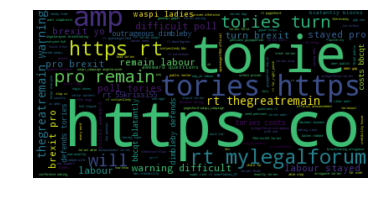

In [120]:
plt.show()